In [1]:
from torch import nn, optim
import SuperFirstMegaNetwork
from SuperFirstMegaNetwork import PrimeNet, train_model, SewnConvNet, make_connector_1conv, make_connector_2conv

Loaded 500 out of 144722 apples
Loaded 500 out of 209447 spiders
Loaded 500 out of 150152 octopuss
Loaded 500 out of 116685 snowflakes
X shape: (2000, 784), type:uint8


In [2]:
model1=PrimeNet(nn.ReLU, nn.MaxPool2d,2,0,0, k_size=5 )
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)
epoch_num=1

output size conv_block: 16.0
output size conv_block: 32.0
output size beetween: 32.0
linear input size: 2048


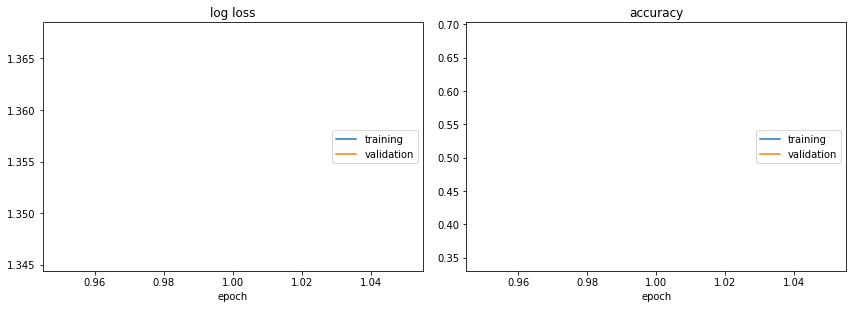

log loss:
training   (min:    1.367, max:    1.367, cur:    1.367)
validation (min:    1.346, max:    1.346, cur:    1.346)

accuracy:
training   (min:    0.347, max:    0.347, cur:    0.347)
validation (min:    0.686, max:    0.686, cur:    0.686)


In [3]:
model1_trained = train_model(model1, criterion, optimizer1, num_epochs=epoch_num)

In [4]:
net_before = nn.Sequential(
    model1.conv_block[0]
)

net_after=nn.Sequential(
    model1.conv_block[1],
    *model1.conv,
    model1.linear_first,
    *model1.linear,
    model1.fc
)

In [5]:
layer_cut=1

In [6]:
connector = make_connector_1conv(model1.give_num_of_ch_in_when_cut(layer_cut),model1.give_num_of_ch_out_when_cut(layer_cut))

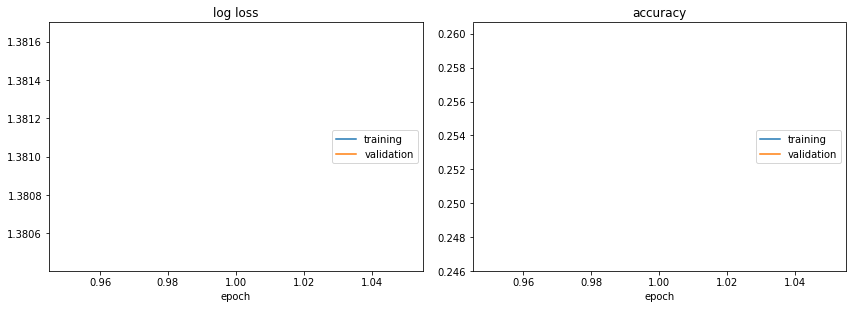

log loss:
training   (min:    1.382, max:    1.382, cur:    1.382)
validation (min:    1.380, max:    1.380, cur:    1.380)

accuracy:
training   (min:    0.247, max:    0.247, cur:    0.247)
validation (min:    0.260, max:    0.260, cur:    0.260)


In [7]:
sewn_model2 = SewnConvNet(net_before, net_after, connector)
optimizer = optim.Adam(sewn_model2.parameters(), lr=1e-4)

sewn_model2_trained = train_model(sewn_model2, criterion, optimizer, num_epochs=epoch_num)

In [8]:
model2=PrimeNet(nn.ReLU, nn.MaxPool2d,1,2,1 )
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)

output size conv_block: 16.0
output size beetween: 16.0
output size conv: 16.0
output size conv: 16.0
linear input size: 4096
output size linear: 128


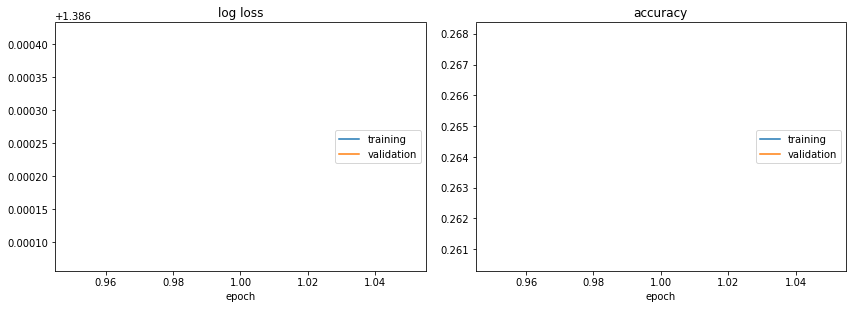

log loss:
training   (min:    1.386, max:    1.386, cur:    1.386)
validation (min:    1.386, max:    1.386, cur:    1.386)

accuracy:
training   (min:    0.261, max:    0.261, cur:    0.261)
validation (min:    0.268, max:    0.268, cur:    0.268)


In [9]:
model2_trained = train_model(model2, criterion, optimizer1, num_epochs=epoch_num)

In [10]:
net_before = nn.Sequential(
    *model1.conv_block
)

net_after=nn.Sequential(
    *model2.conv,
    model2.linear_first,
    *model2.linear,
    model2.fc
)

In [11]:
layer_cut_1=2
layer_cut_2=1
connector = make_connector_1conv(model1.give_num_of_ch_in_when_cut(layer_cut_1),model2.give_num_of_ch_out_when_cut(layer_cut_2))

In [13]:
sewn_model3 = SewnConvNet(net_before, net_after, connector)
optimizer = optim.Adam(sewn_model2.parameters(), lr=1e-4)
sewn_model3_trained = train_model(sewn_model3, criterion, optimizer, num_epochs=epoch_num)

rozmiar przed x: {} torch.Size([64, 1, 32, 32])
rozmiar przed connector x: {} torch.Size([64, 32, 8, 8])
rozmiar po connector x: {} torch.Size([64, 16, 8, 8])


RuntimeError: size mismatch, m1: [64 x 1024], m2: [4096 x 128] at c:\a\w\1\s\tmp_conda_3.7_110206\conda\conda-bld\pytorch_1550401474361\work\aten\src\th\generic/THTensorMath.cpp:940